### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Read DATA

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.
- Identifying duplicates, and determining if they are true duplicates or just records with similarity of available attributes
- Finding missing values, if they are appropriate, and how to handle them
- Addressing the missing values, if applicable
- Examine outliers

## Examining Values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
# Number of rows and columns in the dataframe
data.shape

(12684, 26)

### Duplicate

In [16]:
# look for duplicate data
# Although, with so few attributes and no unique key, it is possible that
# that these are still different people. nonetheless it is useful to know
duplicates = data[data.duplicated()]

print(f'Duplicates: {duplicates.shape[0]}')

Duplicates: 74


### Missing Data

In [19]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

It appears that there are 6 columns with missing data - "car", "Bar", "CoffeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20to50". 

In [22]:
# find any missing values. decide whether to drop these or include them
nulls = data.isnull()
nulls_cnt = nulls.sum()
missing = nulls_cnt[nulls_cnt > 0]
missing.loc['Total Missing']=missing.sum(numeric_only=True)
missing = pd.DataFrame({'Column': missing.index, 'Count': missing.values})

# print total rows, for context
print(f'Total observations in dataset: {data.shape[0]}')
missing['% Missing of Total Rows'] = round(missing['Count'] / data.shape[0]*100,2)
missing['% Missing of Total Rows'] = missing['% Missing of Total Rows'].apply(lambda x: '{:.1f}%'.format(x))

# this line is to simply add a blank value in the cell, because a total of this column
# doesn't make sense in this context
missing.loc[missing['Column']=='Total Missing', '% Missing of Total Rows'] = ' '

print(f'\nCount of missing values by column type: ')
missing

Total observations in dataset: 12684

Count of missing values by column type: 


,Column,Count,% Missing of Total Rows
0,car,12576,99.2%
1,Bar,107,0.8%
2,CoffeeHouse,217,1.7%
3,CarryAway,151,1.2%
4,RestaurantLessThan20,130,1.0%
5,Restaurant20To50,189,1.5%
6,Total Missing,13370,


There are many missing values in the dataset, especially in the "car" field.

The second column in the table above is the % of missing values per column, as a % of the number of observations in the data set. That means that 99.2% of the observations are missing a value for car.

### Outliers

Because we are just counting by categorical data, and not working with many numeric metrics, outlier analysis is not really needed.

## Clean Data

3. Decide what to do about your missing data -- drop, replace, other...

### Renaming Columns

"Y" isn't a good descriptive column name. I'm renaming it to "used" for whether the coupon was used or not.

In [31]:
data = data.rename(columns={"Y": "used"}) # Renaming column from "Y" to "used"

The column "passanger" is misspelled.

In [34]:
data = data.rename(columns={"passanger": "passenger"}) # Renaming to correct spelling

### Dropping Columns

- car: Only 108 out of 12684 rows are non-null.
- toCoupon_GEQ5min: Contains all 1's which does not provide any differentiation between data

In [38]:
data = data.drop(columns=["car"]) # Drop car column
data = data.drop(columns=["toCoupon_GEQ5min"]) # Drop toCoupon_GEQ5min column

### Replacing Values

- time: Replace with military time in integer form.
- expiration: Replace with number of hours in integer form.
- age: Replace below21 with the minimum driving age 16 and replace 50plus with 50.
- education: Assign integer value based on level of education (Some High School -> High School Graduate -> Some college - no degree -> Associates degree -> Bachelors degree -> Graduate degree (Masters or Doctorate)).
- income: Replace with max value of each range and replace $100000 or More with 112499 to maintain linearity.
- Bar: Replace range with max value in range. Replace gt8 with 9.
- CoffeeHouse: Replace range with max value in range. Replace gt8 with 9.
- CarryAway: Replace range with max value in range. Replace gt8 with 9.
- RestaurantLessThan20: Replace range with max value in range. Replace gt8 with 9.
- Restaurant20To50: Replace range with max value in range. Replace gt8 with 9.

In [44]:
# Creating dictionary of replacment values for individual columns
replace_val = {"time": {"6PM": 18, "7AM": 7, "10AM": 10, "2PM": 14, "10PM": 22},
               "expiration": {"1d": 24, "2h": 2}, 
               "age": {"below21": 16, "50plus": 50}, 
               "education": {"Some High School": 0, "High School Graduate": 1, "Some college - no degree": 2, "Associates degree": 3, "Bachelors degree": 4, "Graduate degree (Masters or Doctorate)": 5}, 
               "income": {"Less than $12500": 12500, "$12500 - $24999": 24999, "$25000 - $37499": 37499, "$37500 - $49999": 49999, "$50000 - $62499": 62499, "$62500 - $74999": 74999, "$75000 - $87499": 87499, "$87500 - $99999": 99999, "$100000 or More": 112499}}

# Creating new dataframe with replacement values
replaced_data = data.replace(replace_val)

# Group columns with same values together and replace
replaced_data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]] = replaced_data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].replace({"never": 0, "less1": 1, "1~3": 3, "4~8": 8, "gt8": 9})

# Convert age column to integer
replaced_data["age"] = replaced_data["age"].astype(int)

/var/folders/wy/hzb3jvyj6d17dfqjx3m35s7r0000gq/T/ipykernel_69428/2320531750.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replaced_data = data.replace(replace_val)
/var/folders/wy/hzb3jvyj6d17dfqjx3m35s7r0000gq/T/ipykernel_69428/2320531750.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replaced_data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]] = replaced_data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].replace({"never": 0, "less1": 1, "1~3": 3, "4

In [46]:
replaced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passenger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  int64  
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  int64  
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  int64  
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  int64  
 14  Bar                   12577 non-null  float64
 15  CoffeeHouse        

4. What proportion of the total observations chose to accept the coupon?



/var/folders/wy/hzb3jvyj6d17dfqjx3m35s7r0000gq/T/ipykernel_69428/931797737.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([used_coup[0], unused_coup[0]], labels= ["Used", "Unused"], autopct='%.0f%%')


Text(0.5, 0.98, 'Coupon Usage')

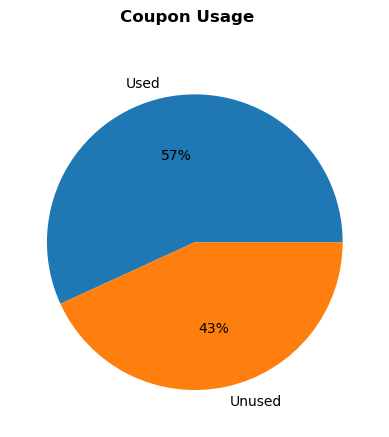

In [50]:
# Counting number of used coupons and unused coupons
used_coup= replaced_data.query("used == 1").count()
unused_coup = replaced_data.query("used == 0").count()

# Generating pie chart
plt.pie([used_coup[0], unused_coup[0]], labels= ["Used", "Unused"], autopct='%.0f%%') 
plt.suptitle("Coupon Usage", fontweight="bold")

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

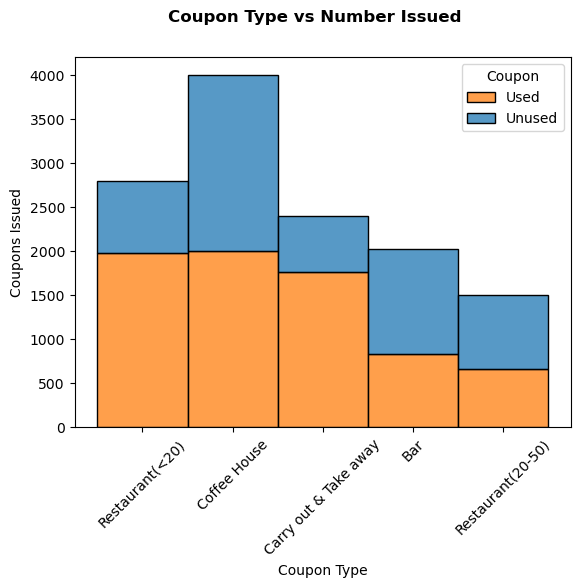

In [52]:
# Generate bar plot with coupon type on x-axis and number issued on y-axis differentiated by whether the coupon was used or not
sns.histplot(replaced_data, x = "coupon", hue = "used", multiple = "stack")
plt.xlabel("Coupon Type")
plt.ylabel("Coupons Issued")
plt.suptitle("Coupon Type vs Number Issued", fontweight="bold")
plt.legend(title="Coupon", loc="upper right", labels=["Used", "Unused"])
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

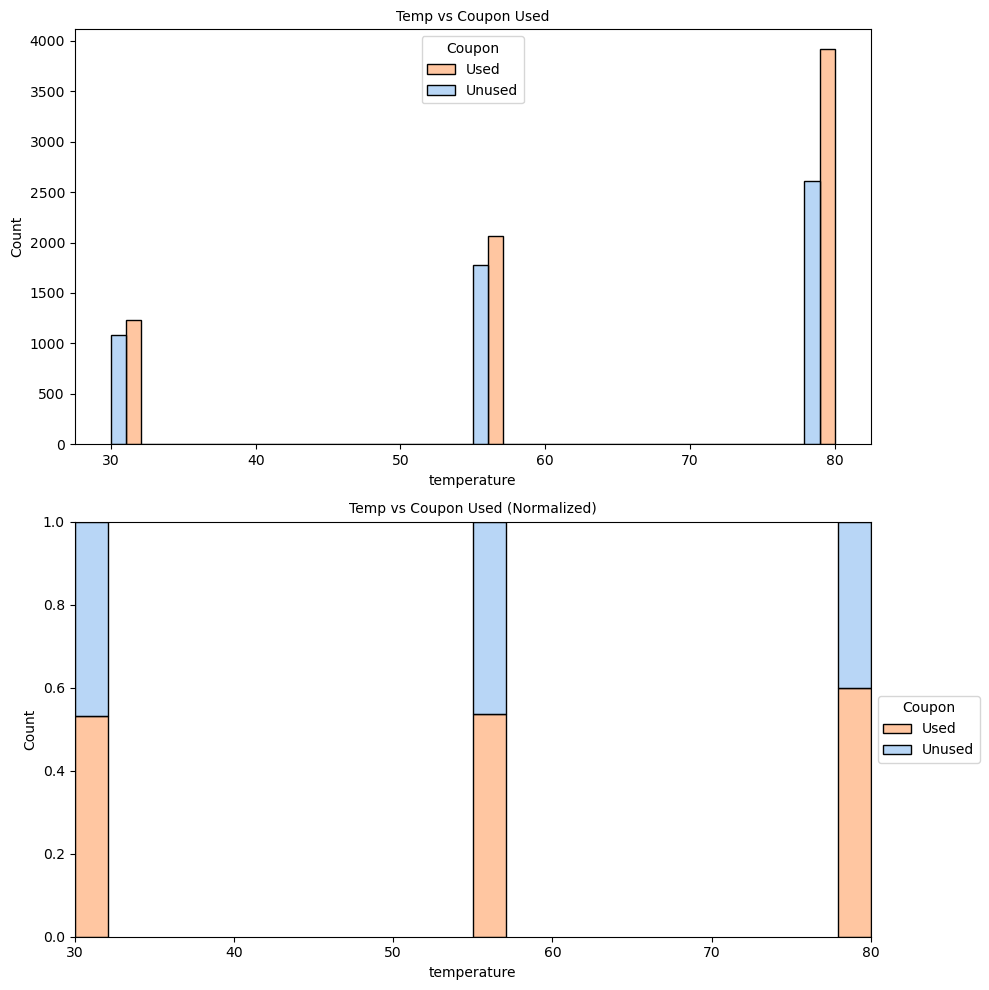

In [54]:
# Creating histogram of temperature vs count
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data = replaced_data, x = "temperature", hue = "used", multiple = "dodge", palette = "pastel")
plt.title("Temp vs Coupon Used", fontsize = 10)
plt.legend(title="Coupon", loc="upper center", labels=["Used", "Unused"])


# Normalizing to see portion of coupons used at different temperatures
plt.subplot(2,1,2)
sns.histplot(data = replaced_data, x = "temperature", hue = "used", multiple = "fill", palette = "pastel")
plt.title("Temp vs Coupon Used (Normalized)", fontsize = 10)
plt.legend(title="Coupon", loc="center left", bbox_to_anchor=(1, 0.5), labels=["Used", "Unused"])

# Optimize layout
plt.tight_layout()

We see in the graphs above that acceptance rate is slightly higher for 80 degree temperature.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [56]:
# Create df_bar with just bar coupons
df_bar = replaced_data.query("coupon == 'Bar'")

# Check first 5 rows
df_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,used
9,No Urgent Place,Kid(s),Sunny,80,10,Bar,24,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,1,0,0,1,0
13,Home,Alone,Sunny,55,18,Bar,24,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,0,0,1,0,1
17,Work,Alone,Sunny,55,7,Bar,24,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,21,Single,...,0.0,1.0,8.0,8.0,1.0,0,0,0,1,1
35,Home,Alone,Sunny,55,18,Bar,24,Male,21,Single,...,0.0,1.0,8.0,8.0,1.0,0,0,1,0,1


2. What proportion of bar coupons were accepted?


/var/folders/wy/hzb3jvyj6d17dfqjx3m35s7r0000gq/T/ipykernel_69428/3524387168.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([used_bar[0], unused_bar[0]], labels= ["Used", "Unused"], autopct="%.0f%%")


Text(0.5, 0.98, 'Coupon Acceptance')

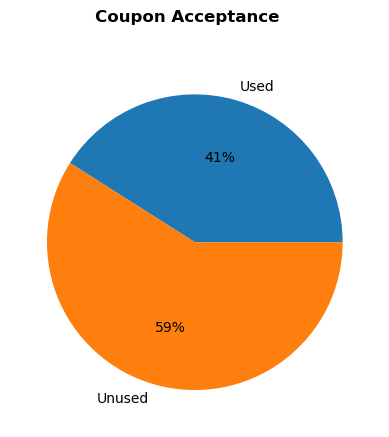

In [58]:
# Find number of coupons used/unused
used_bar= df_bar.query("used == 1").count()
unused_bar = df_bar.query("used == 0").count()

# Generate pie chart
plt.pie([used_bar[0], unused_bar[0]], labels= ["Used", "Unused"], autopct="%.0f%%")
plt.suptitle("Coupon Acceptance", fontweight="bold")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


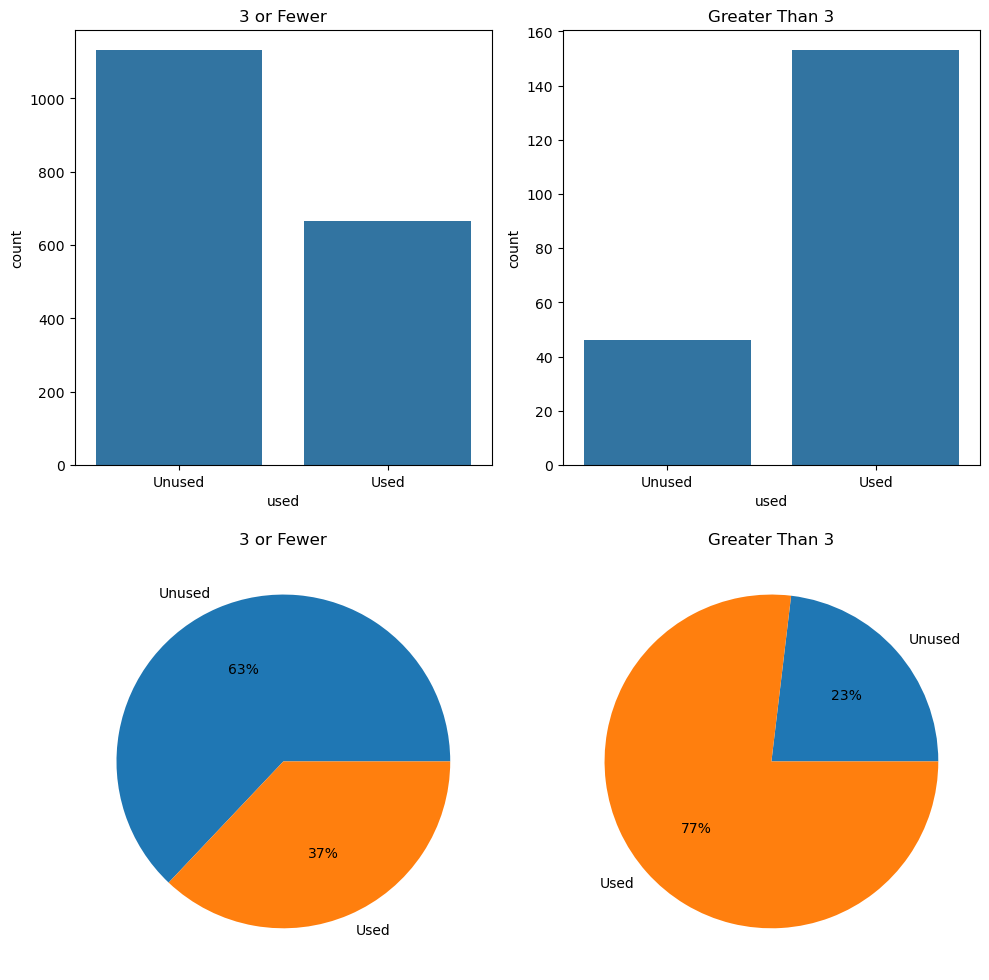

In [60]:
# Split data based on criteria, count coupons used/unused in each group, generate df of values ("unused", "used")
leq3 = df_bar.query('Bar <= 3')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
g3 = df_bar.query('Bar > 3')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()

#Set fig size
plt.figure(figsize=(10,10))

# Plot bar graphs
plt.subplot(2,2,1)
sns.barplot(data=leq3, x = "used", y = 'count')
plt.title("3 or Fewer")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,2,2)
sns.barplot(data=g3, x = "used", y = 'count')
plt.title("Greater Than 3")
plt.xticks([0,1], ["Unused", "Used"])

# Plot pie charts
plt.subplot(2,2,3)
plt.pie(leq3['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("3 or Fewer")

plt.subplot(2,2,4)
plt.pie(g3['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Greater Than 3")

# Optimize layout
plt.tight_layout()

Unsurprisingly, frequent bargoers were more likely to accept the bar coupon!

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


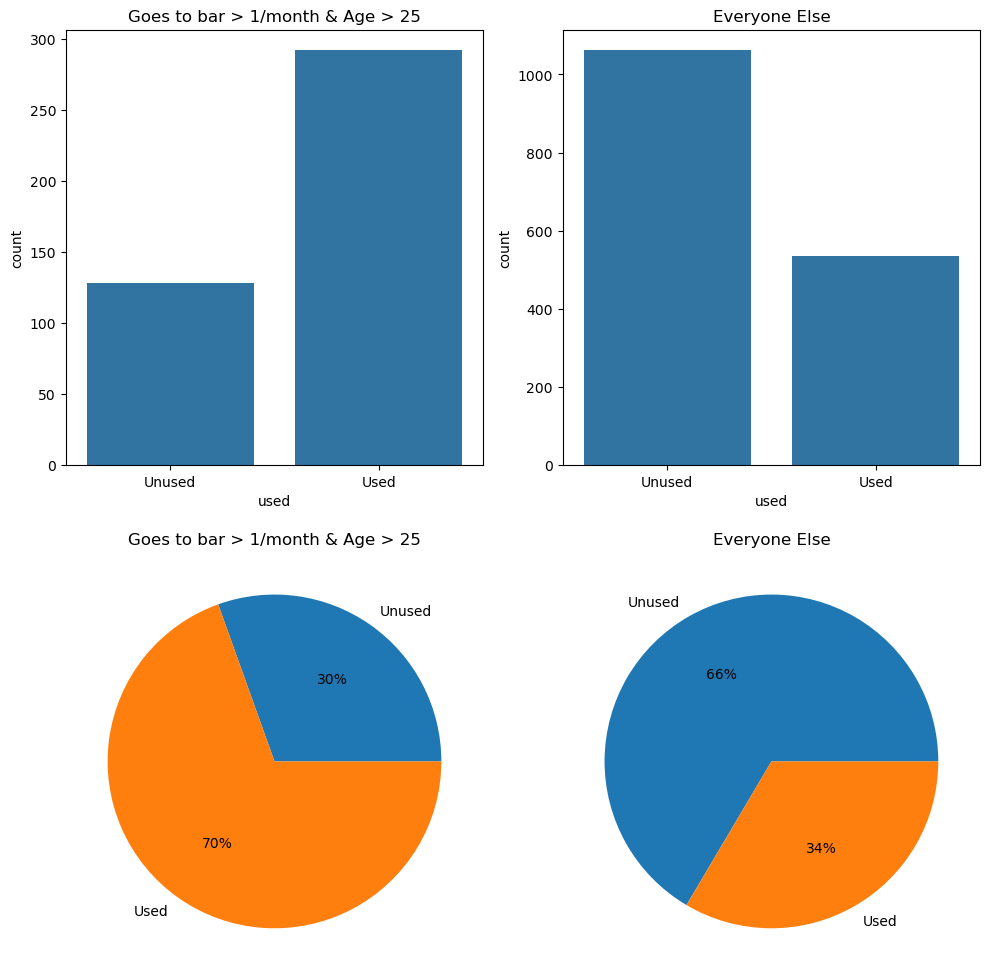

In [62]:
# Split data based on criteria, count coupons used/unused in each group, generate df of values ("unused", "used")
g1m_over25 = df_bar.query('Bar >= 3 & age >=26')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
not_g1m_over25 = df_bar.query('not (Bar >= 3 & age >=26)')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()

# Set fig size
plt.figure(figsize=(10,10))

# Plot bar graphs
plt.subplot(2,2,1)
sns.barplot(data=g1m_over25, x = "used", y = 'count')
plt.title("Goes to bar > 1/month & Age > 25")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,2,2)
sns.barplot(data=not_g1m_over25, x = "used", y = 'count')
plt.title("Everyone Else")
plt.xticks([0,1], ["Unused", "Used"])

# Plot pie charts
plt.subplot(2,2,3)
plt.pie(g1m_over25['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Goes to bar > 1/month & Age > 25")

plt.subplot(2,2,4)
plt.pie(not_g1m_over25['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Everyone Else")

# Optimize layout
plt.tight_layout()

Unsurprisingly, slightly older individuals who drive and go to the bar at least sometimes have a higher acceptance rate! One point of possible investigation relates to age: Perhaps age just correlates with something more important to the question at hand, such as income.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Comparing the acceptance rate between drivers who:
- Meets criteria: going to bars more than once a month AND had passengers that were not a kid AND had occupations other than farming, fishing, or forestry.

- Everyone else who does not meet criteria

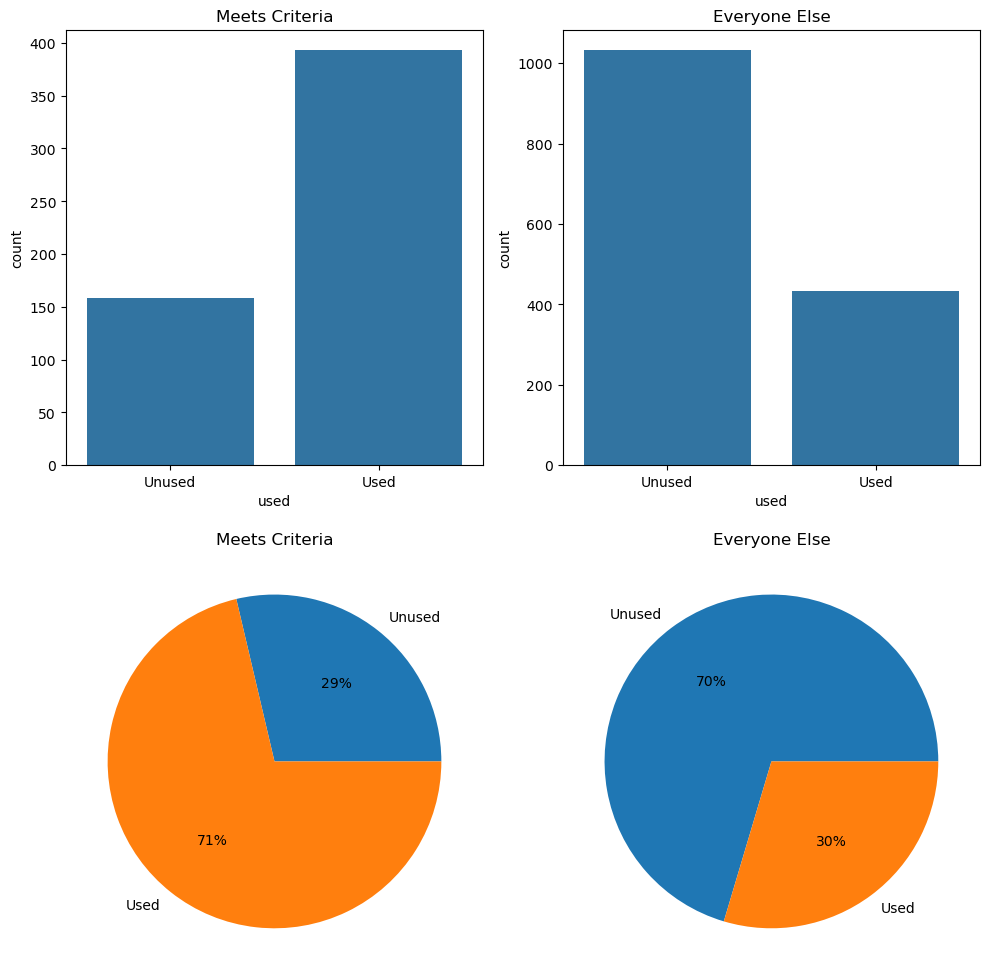

In [69]:
# Split data based on criteria, count coupons used/unused in each group, generate df of values ("unused", "used")
g1m_pnk_onfff = df_bar.query("Bar >= 3 & passenger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry'")['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
not_g1m_pnk_onfff = df_bar.query("not (Bar >= 3 & passenger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry')")['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()

# Set fig size
plt.figure(figsize=(10,10))

# Plot bar graph
plt.subplot(2,2,1)
sns.barplot(data=g1m_pnk_onfff, x = "used", y = 'count')
plt.title("Meets Criteria")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,2,2)
sns.barplot(data=not_g1m_pnk_onfff, x = "used", y = 'count')
plt.title("Everyone Else")
plt.xticks([0,1], ["Unused", "Used"])

# Plot pie chart
plt.subplot(2,2,3)
plt.pie(g1m_pnk_onfff['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Meets Criteria")

plt.subplot(2,2,4)
plt.pie(not_g1m_pnk_onfff['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Everyone Else")

# Optimize layout
plt.tight_layout()

From the plots above we are again seeing the acceptance rate at about 70% in the group containing those who went to bars more than once per month.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



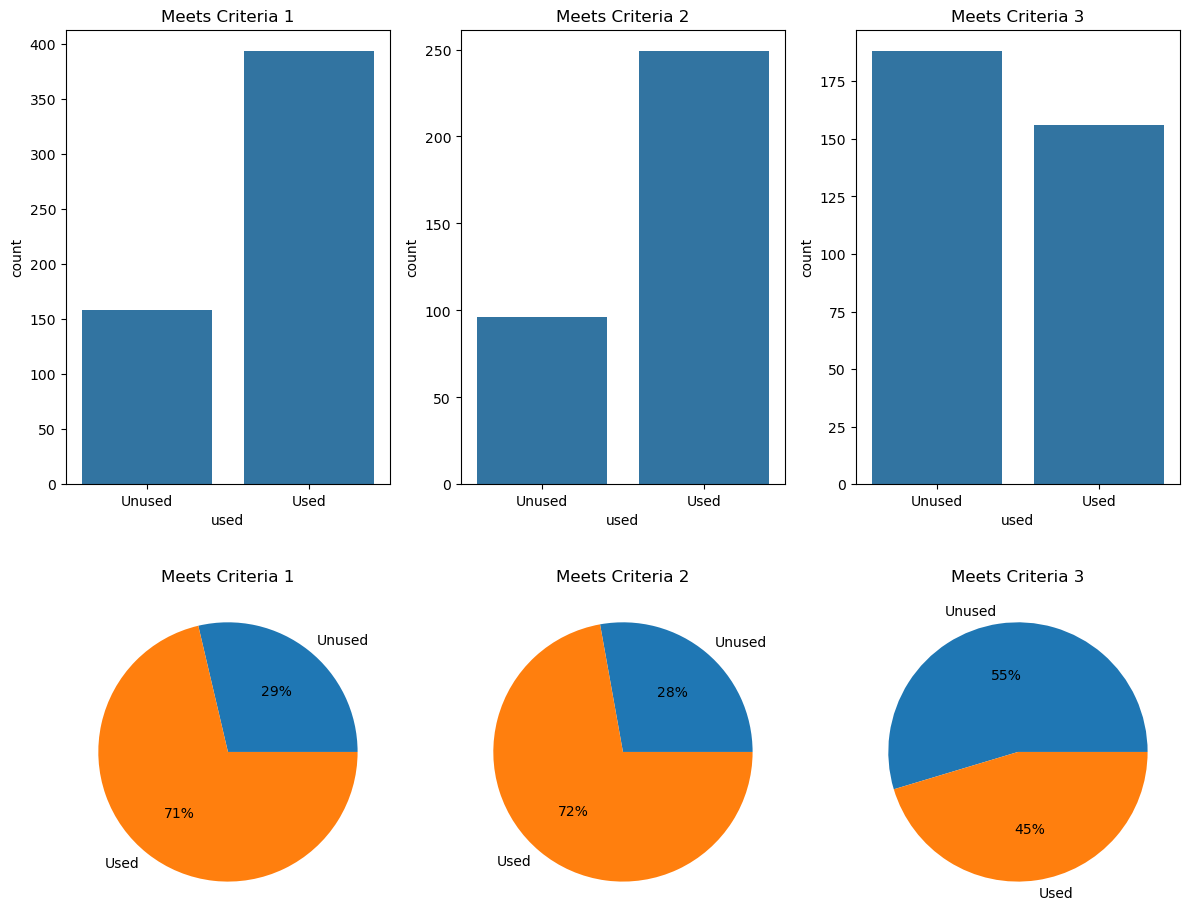

In [71]:
# Convert criterias to strings
criteria1 = "Bar >= 3 & passenger != 'Kid(s)' & maritalStatus != 'Widowed'"
criteria2 = "Bar >= 3 & age < 31"
criteria3 = "RestaurantLessThan20 >= 4 & income <= 49999 "

# Create df for each criteria
crit1_df = df_bar.query(criteria1)['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
crit2_df = df_bar.query(criteria2)['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
crit3_df = df_bar.query(criteria3)['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()

# Set fig size
plt.figure(figsize=(12,10))

# Plot bar graph
plt.subplot(2,3,1)
sns.barplot(data=crit1_df, x = "used", y = 'count')
plt.title("Meets Criteria 1")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,3,2)
sns.barplot(data=crit2_df, x = "used", y = 'count')
plt.title("Meets Criteria 2")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,3,3)
sns.barplot(data=crit3_df, x = "used", y = 'count')
plt.title("Meets Criteria 3")
plt.xticks([0,1], ["Unused", "Used"])

# Plot pie chart
plt.subplot(2,3,4)
plt.pie(crit1_df['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Meets Criteria 1")

plt.subplot(2,3,5)
plt.pie(crit2_df['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Meets Criteria 2")

plt.subplot(2,3,6)
plt.pie(crit3_df['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Meets Criteria 3")
plt.tight_layout()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the plots above it is clear that regardless of other factors, drivers who frequent bars more than once a month will use the coupon about 70% of the time, whereas on average overall the acceptance rate is much lower.

Of drivers who goes to a bar more than once per month, about 70% will use the coupon. In addition to frequency of bar visits, we combined it with other attributes such as:

- Age
- Passenger
- Occupation
- Marital status
- The percentage remains around 70% even when these other attributes are factored in and/or changed.

When these attributes are changed we saw acceptance rate varying between 30% - 45%

Furthermore, when we compared bar coupon acceptance rate for those who went 3 times or less per a month with those who went more than 3 times/month, we saw that the acceptance rate went up to 77%. This indicates that the main factor that determines whether a bar coupon will be used is how frequently the driver goes to a bar.

Given this information, it is recommended that bar coupons be issued to those who frequent bars as those coupons are more likely to be used.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating Coffee House Coupons

Creating a DataFrame with only data on coffee house coupons

In [78]:
# Create df_coffee with just coffee house coupons
df_coffee = replaced_data.query("coupon == 'Coffee House'")

# Check first 5 rows
df_coffee.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,used
1,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,2,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,24,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,18,Coffee House,2,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,1,0,0,1,1
15,Home,Alone,Sunny,80,18,Coffee House,2,Female,21,Unmarried partner,...,0.0,0.0,NaN,8.0,3.0,0,0,0,1,0


create a heatmap from the correlation matrix to find a good starting point for exploring the data

<Axes: >

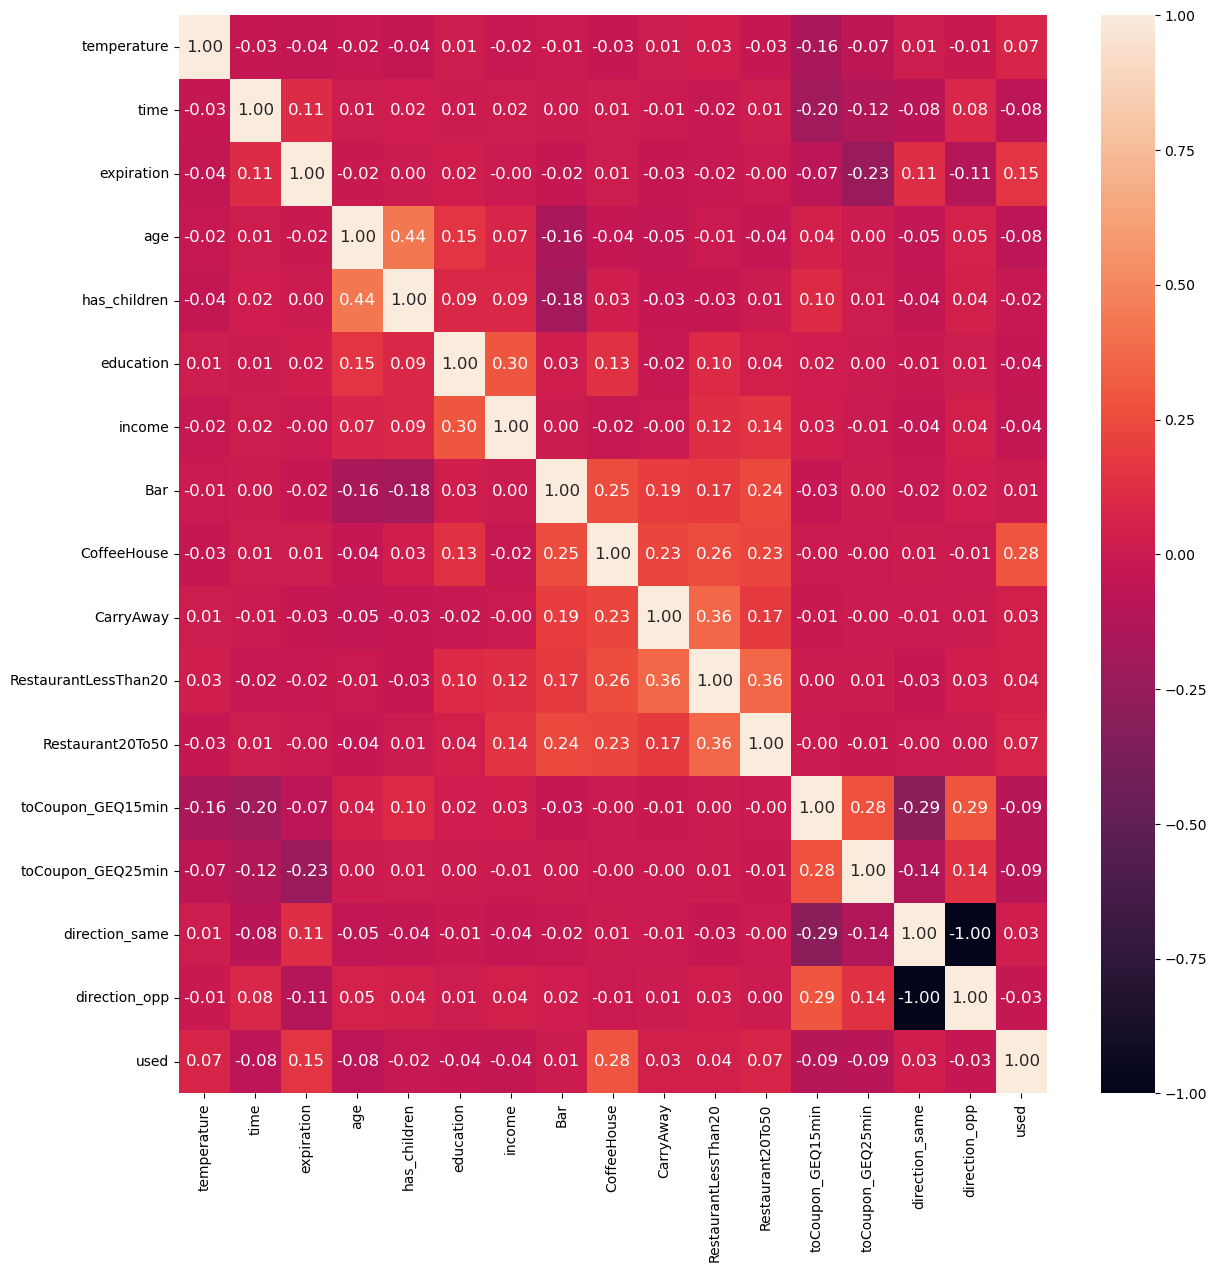

In [80]:
# Creating correlation matrix from only NUMERIC columns
corr_matrix = df_coffee.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':12}, fmt=".2f")

Only the bottom row/right most column matters for investigating how various factors affect whether a coffee house coupon is accepted. There are two numeric variables that is positively correlated with coffee house coupon acceptance rate: expiration and CoffeeHouse. It makes sense that whether or not a driver uses a coupon would be correlated with how frequently they go to a coffee house- so instead, lets delve into expiration.

The two possible values for expiration, as we saw previously, were 2h and 1d which we've converted into number of hours in integer form (2 and 24, respectively). Let's first compare the acceptance rate of each:

### Expiration vs Acceptance Rate

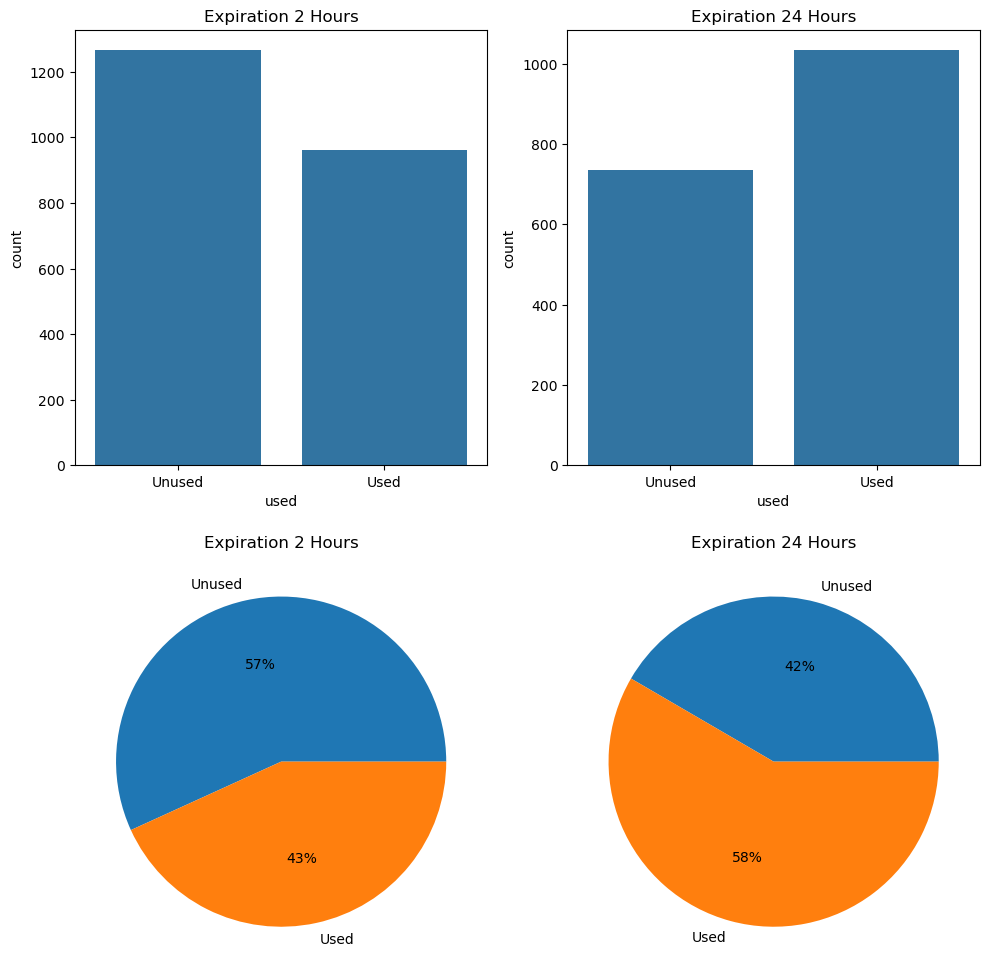

In [83]:
exp_2h = df_coffee.query('expiration == 2')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()
exp_24h = df_coffee.query('expiration == 24')['used'].value_counts().to_frame().sort_values(by = 'used').reset_index()

#Set fig size
plt.figure(figsize=(10,10))

# Plot bar graphs
plt.subplot(2,2,1)
sns.barplot(data=exp_2h, x = "used", y = 'count')
plt.title("Expiration 2 Hours")
plt.xticks([0,1], ["Unused", "Used"])

plt.subplot(2,2,2)
sns.barplot(data=exp_24h, x = "used", y = 'count')
plt.title("Expiration 24 Hours")
plt.xticks([0,1], ["Unused", "Used"])

# Plot pie charts
plt.subplot(2,2,3)
plt.pie(exp_2h['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Expiration 2 Hours")

plt.subplot(2,2,4)
plt.pie(exp_24h['count'], labels= ["Unused", "Used"], autopct='%.0f%%')
plt.title("Expiration 24 Hours")

# Optimize layout
plt.tight_layout()

The acceptance rate for 1 day expiration (58%) is much higher compared to the acceptance rate for 2 hour expiration (43%).